In [1]:
import pandas as pd
from gseapy.plot import gseaplot
import gseapy as gp
import numpy as np

In [3]:
df = pd.read_csv('results_df_4.csv').dropna()
df

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,significant,minus_log10_pvalue,gene,Rank
1,2,50.547822,-0.335524,0.291486,-1.151081,0.249699,0.592709,False,0.602583,AAAS,-0.076217
2,3,33.718432,-0.386298,0.346999,-1.113254,0.265599,0.607918,False,0.575773,AACS,-0.083500
4,5,55.778836,0.367238,0.300092,1.223751,0.221046,0.557202,False,0.655517,AAED1,0.093274
5,6,27.097352,0.224717,0.389453,0.577007,0.563935,0.851318,False,0.248771,AAGAB,0.015710
7,8,207.354994,-0.173321,0.225858,-0.767388,0.442851,0.775146,False,0.353742,AAMDC,-0.019172
...,...,...,...,...,...,...,...,...,...,...,...
11551,11552,72.070221,-1.459460,0.311005,-4.692725,0.000003,0.000071,True,5.569297,ZWINT,-6.052498
11553,11554,8.910392,0.424035,0.662952,0.639617,0.522422,0.829751,False,0.281979,ZXDC,0.034369
11554,11555,8.566333,0.493505,0.682002,0.723612,0.469304,0.793804,False,0.328546,ZYG11B,0.049492
11555,11556,95.255197,0.538767,0.229714,2.345388,0.019007,0.111026,False,1.721080,ZYX,0.514295


In [4]:
df['Rank'] = -np.log10(df.padj)*df.log2FoldChange

df = df.sort_values('Rank', ascending = False).reset_index(drop = True)

df

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,significant,minus_log10_pvalue,gene,Rank
0,5735,2042.455181,3.208797,0.146216,21.945559,9.548634e-107,4.127397e-103,True,106.020059,MMP7,328.530512
1,2291,239.852135,4.654261,0.315796,14.738172,3.665757e-49,5.281745e-46,True,48.435836,CYR61,210.732033
2,2248,439.637752,4.297945,0.345878,12.426195,1.883907e-35,1.628637e-32,True,34.724941,CXCL1,136.623835
3,9003,157.562503,2.960685,0.253807,11.665118,1.921376e-31,9.227941e-29,True,30.716388,SMPD1,83.002492
4,9724,163.051381,4.455411,0.478190,9.317244,1.194013e-20,2.580561e-18,True,19.922991,THBS1,78.363048
...,...,...,...,...,...,...,...,...,...,...,...
8640,4346,90.288136,-3.149013,0.256860,-12.259668,1.491092e-34,1.074208e-31,True,33.826496,IFITM1,-97.521509
8641,686,840.665656,-2.608238,0.149015,-17.503210,1.354187e-68,2.926736e-65,True,67.868322,ASPH,-168.318999
8642,9809,294.498134,-2.799332,0.160595,-17.430962,4.803112e-68,8.304581e-65,True,67.318477,TM4SF1,-179.383129
8643,4163,279.851081,-3.810714,0.196393,-19.403481,7.211840e-84,2.078212e-80,True,83.141954,HMGA1,-303.646521


In [26]:
ranking = df[['gene', 'Rank']]
ranking

,gene,Rank
0,MMP7,328.530512
1,CYR61,210.732033
2,CXCL1,136.623835
3,SMPD1,83.002492
4,THBS1,78.363048
...,...,...
8640,IFITM1,-97.521509
8641,ASPH,-168.318999
8642,TM4SF1,-179.383129
8643,HMGA1,-303.646521


In [27]:
ranking.dtypes

gene     object
Rank    float64
dtype: object

In [30]:
# check duplicated values
ranking.gene.duplicated().sum()

1

In [31]:
# Drop the duplicated values
ranking = ranking.drop_duplicates(subset = 'gene', keep = 'first').reset_index(drop = True)

In [33]:
ranking

,gene,Rank
0,MMP7,328.530512
1,CYR61,210.732033
2,CXCL1,136.623835
3,SMPD1,83.002492
4,THBS1,78.363048
...,...,...
8639,IFITM1,-97.521509
8640,ASPH,-168.318999
8641,TM4SF1,-179.383129
8642,HMGA1,-303.646521


In [34]:
ranking.dtypes

gene     object
Rank    float64
dtype: object

In [35]:
ranking.isnull().sum()

gene    0
Rank    0
dtype: int64

In [7]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisG

In [41]:
pre_res = gp.prerank(rnk=ranking, 
                     gene_sets='GO_Biological_Process_2021', 
                     seed=6, 
                     permutation_num=100)

2024-01-11 21:54:43,558 [WARNING] Duplicated values found in preranked stats: 0.94% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [37]:
pre_res = gp.prerank(rnk = ranking, gene_sets = 'CORUM', seed = 6, permutation_num = 100)

2024-01-11 21:51:49,497 [WARNING] Duplicated values found in preranked stats: 0.94% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [42]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,transmembrane receptor protein tyrosine kinase...,0.000000,-0.902137,-1.771680
1,external encapsulating structure organization ...,0.135596,0.926106,1.623122
2,response to steroid hormone (GO:0048545),0.217624,0.973205,1.594803
3,extracellular structure organization (GO:0043062),0.220972,0.926057,1.629308
4,mitotic spindle organization (GO:0007052),0.234156,-0.873421,-1.632717
...,...,...,...,...
1636,regulation of mitochondrial translation (GO:00...,0.998812,-0.325780,-0.464203
1637,"nucleotide-binding domain, leucine rich repeat...",0.999628,-0.292166,-0.427491
1638,nucleotide-binding oligomerization domain cont...,0.999856,-0.241283,-0.346510
1639,clathrin-dependent endocytosis (GO:0072583),0.999864,0.232728,0.346925


In [50]:
pre_res.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,transmembrane receptor protein tyrosine kinase...,-0.902137,-1.77168,0.0,0.0,0.0,5/204,1.05%,PLAT;RASA1;NAMPT;HNRNPA1;STMN1
1,prerank,DNA-dependent DNA replication (GO:0006261),-0.896073,-1.651092,0.0,0.298923,0.31,31/114,6.68%,HMGA1;POLB;MCM7;MCM6;MCM4;RFC4;MCM5;CDK2;RFC5;...
2,prerank,microtubule cytoskeleton organization involved...,-0.880833,-1.633629,0.020833,0.302244,0.41,52/107,8.39%,NUSAP1;KIF4A;BUB1B;CENPF;STMN1;DLGAP5;CENPU;KI...
3,prerank,mitotic spindle organization (GO:0007052),-0.873421,-1.632717,0.0,0.234156,0.42,56/127,8.39%,KIF4A;BUB1B;PRC1;CENPF;STMN1;DLGAP5;CENPU;KIF2...
4,prerank,extracellular structure organization (GO:0043062),0.926057,1.629308,0.020833,0.220972,0.12,10/52,1.37%,MMP7;THBS1;TGFBI;FN1;HSPG2;MMP24;NDNF;LAMB2;MM...


In [46]:
term_to_graph = out_df.iloc[0].Term
term_to_graph

'transmembrane receptor protein tyrosine kinase signaling pathway (GO:0007169)'

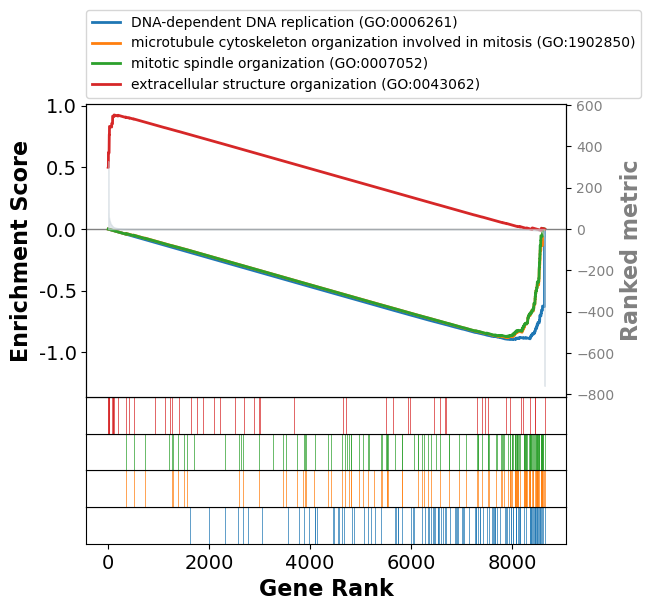

In [52]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[1:5],
                   #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )

In [ ]:
gseaplot(pre_res.ranking, term = term_to_graph, **pre_res.results[term_to_graph])

In [54]:
from gseapy import barplot, dotplot

In [56]:
top_genes_GSEA= pd.read_csv('top_genes_GSEA.csv')

In [ ]:
# Create a list of gene names
gene_list = list(top_genes_GSEA['gene'])

# Run GSEA
enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets=['KEGG_2019_Human', 'Reactome_2016', 'BioPlanet_2019', 'GO_Biological_Process_2018', 'GO_Cellular_Component_2018', 'GO_Molecular_Function_2018'], # 'ENCODE_and_ChEA_Consensus_TFs_from_ChIP-X', 'ENCODE_Histone_Modifications_2015', 'ENCODE_TF_ChIP-seq_2015'
    #description='test_name',
    outdir='test/enrichr_kegg',
    cutoff=0.5  # only get pathways with p-value < 0.05
)

# Plot the results
barplot(enr.res2d, title='Pathways')

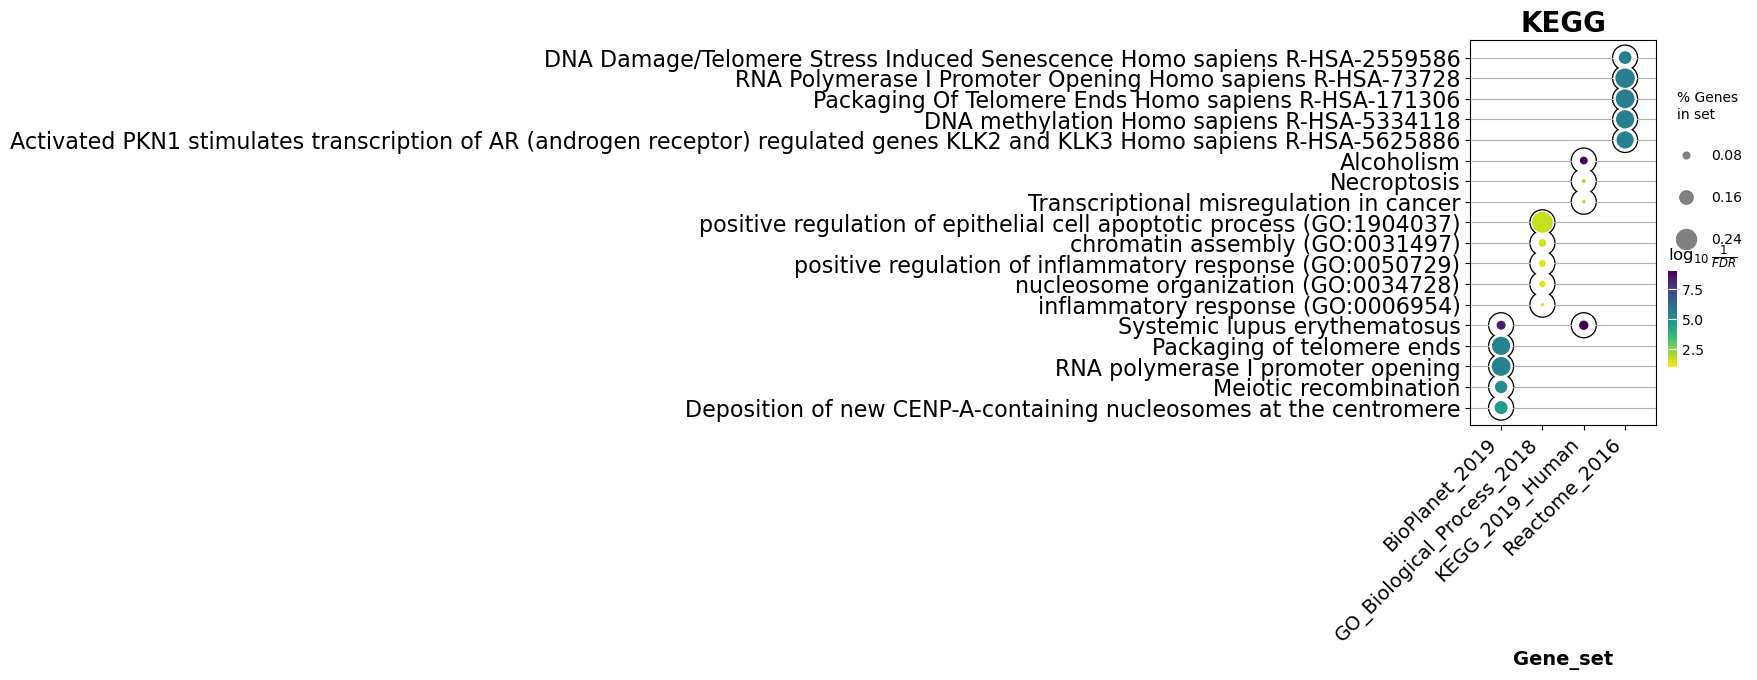

In [59]:
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

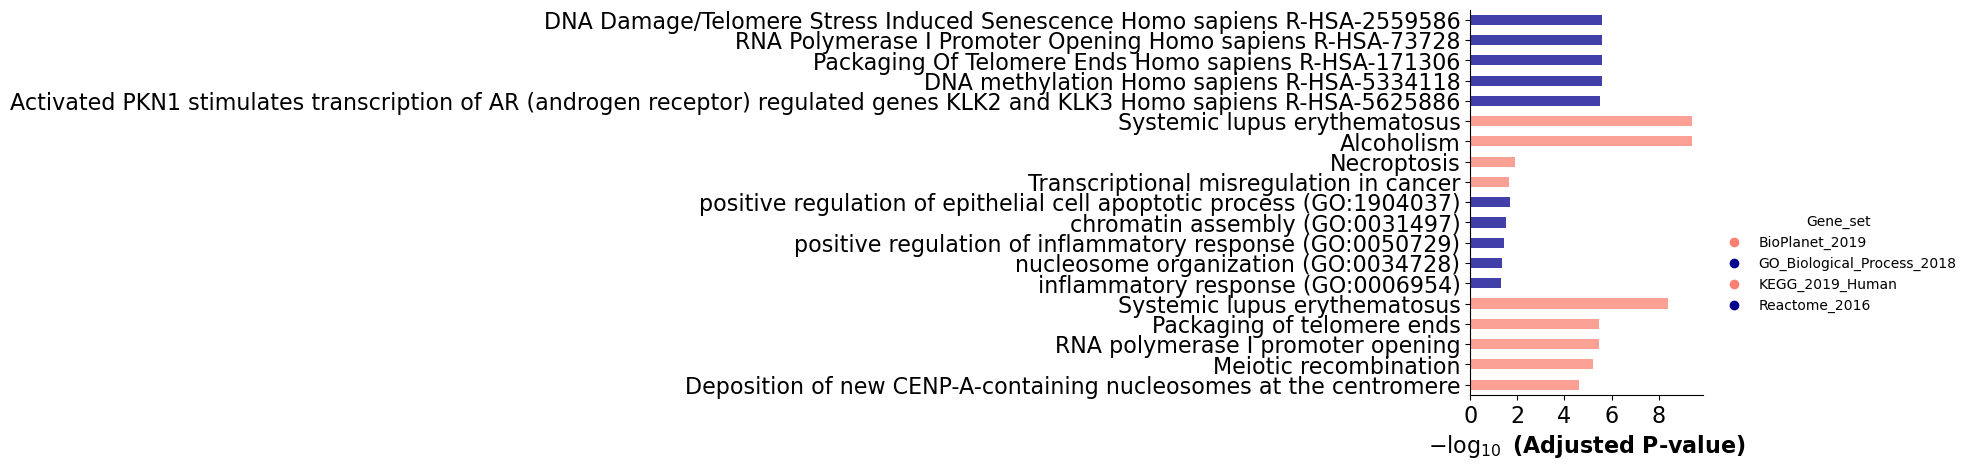

In [60]:
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              #color=['darkred', 'darkblue'] # set colors for group
              color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

In [ ]:
ax = barplot(enr.res2d,title='KEGG_2021_Human', figsize=(4, 5), color='darkred')

In [64]:
import matplotlib.pyplot as plt

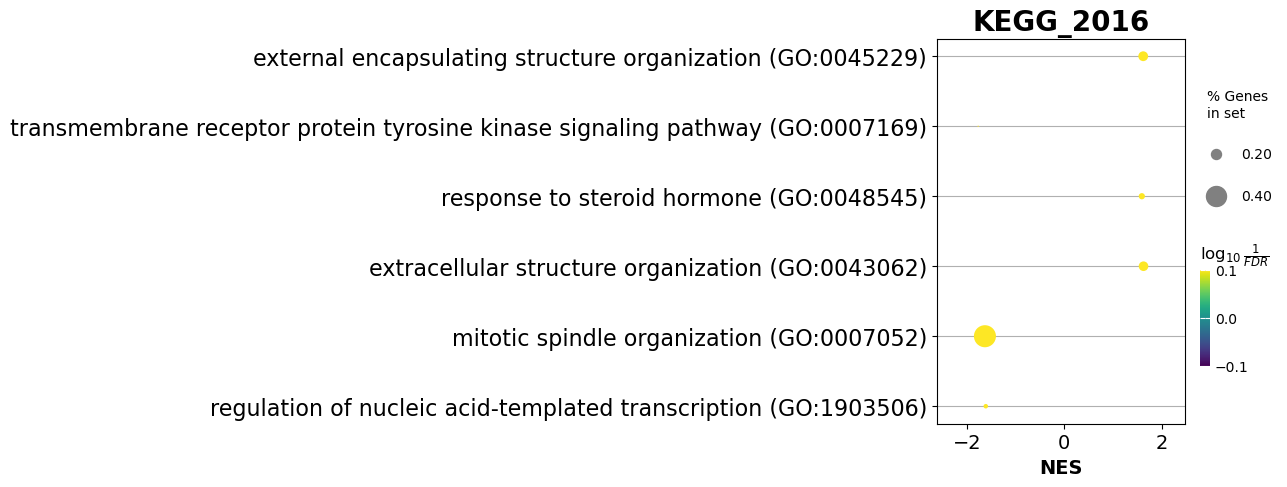

In [65]:
from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(pre_res.res2d,
             column="FDR q-val",
             title='KEGG_2016',
             cmap=plt.cm.viridis,
             size=6, # adjust dot size
             figsize=(4,5), cutoff=0.25, show_ring=False)

In [67]:
from gseapy import enrichment_map
# return two dataframe
nodes, edges = enrichment_map(pre_res.res2d)

In [72]:
nodes.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,prerank,transmembrane receptor protein tyrosine kinase...,-0.902137,-1.77168,0.0,0.0,0.0,5/204,1.05%,PLAT;RASA1;NAMPT;HNRNPA1;STMN1,inf,0.02451


In [73]:
edges.head(5)

,src_idx,targ_idx,src_name,targ_name,jaccard_coef,overlap_coef,overlap_genes


In [68]:
import networkx as nx

In [69]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()